<center><img src=img/MScAI_brand.png width=70%></center>

# Pandas


* Reading and writing data with Pandas

* Manipulating data with Pandas

* Prerequisites: Numpy

Pandas is a library for data manipulation in Python. 

In [1]:
import pandas as pd

The central object is the Pandas `DataFrame`, but it is built on top of the Pandas `Series` so we'll look at that first. 

A `Series` is like a 1D Numpy `array`:

In [2]:
data = pd.Series([0.25, 0.5, 0.75, 1.0])
data

0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64

Also, the values can be any type (but usually homogeneous):

In [3]:
data = pd.Series(["a", "b", "c", "d"])
data

0    a
1    b
2    c
3    d
dtype: object

The indices can also be anything -- in contrast to a Numpy array -- not just contiguous integers starting from 0.

In [4]:
data = pd.Series([0.25, 0.5, 0.75, 1.0], 
                 index=[4, 2, 4/3, 1])

In [5]:
data

4.000000    0.25
2.000000    0.50
1.333333    0.75
1.000000    1.00
dtype: float64

The indices don't have to be unique because location is maintained:

In [6]:
data = pd.Series([0.25, 0.5, 0.75, 1.0], 
                 index=[4, 2, 2, 1])
data

4    0.25
2    0.50
2    0.75
1    1.00
dtype: float64

The indices will usually be of homogeneous types but it's not strictly required.

### DataFrames

A good way to think of a DataFrame is: it's like a `dict` where the keys are strings (column headers) and the values are Series with a common index.

In [7]:
df = pd.DataFrame({"a": [4, 5, 6, 7], 
                   "b": [0.4, 0.5, 0.6, 0.7]}, 
                  index=[10, 11, 12, 13])
df

,a,b
10,4,0.4
11,5,0.5
12,6,0.6
13,7,0.7


In [8]:
type(df["a"])

pandas.core.series.Series

In [9]:
df["a"].index

Int64Index([10, 11, 12, 13], dtype='int64')

The `id()` function gets the location of an object in memory. So this proves that the entire DataFrame shares a single `index`:

In [10]:
id(df["a"].index) == id(df["b"].index)

True

"NumPy arrays have one dtype for the entire array, while pandas DataFrames have one dtype per column" (from https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html). So, DataFrames are suitable for "rectangular", spreadsheet-like data with potentially a different data type in each column. So, we'll now see how to create a DataFrame by reading a file in a spreadsheet-like format.

### Reading data with Pandas


The file we're going to use as an example is `data/irish_cities.txt`, available in Blackboard. The columns are separated by tab characters. Also, the file has a *header* which is not part of the data proper. 

In [11]:
# ! introduces a shell command
!head data/irish_cities.txt 

# Copied from http://www.tageo.com/index-e-ei-cities-IE.htm -- James McDermott
#Rank	City	Population (2000)	Latitude (DD)	Longitude (DD)
1	Dublin	1027900	53.330	-6.250
2	Cork	195400	51.900	-8.470
3	Limerick	85700	52.670	-8.630
4	Galway	68600	53.280	-9.060
5	Waterford	48300	52.260	-7.130
6	Dundalk	34400	54.020	-6.420
7	Bray	32300	53.210	-6.110
8	Drogheda	28800	53.720	-6.360


Pandas `read_csv` makes it easy to deal with all this. We use `sep="\t"` to say the file is *tab*-separated. And we tell it to skip the first row, which is just a comment. It then correctly uses the second row to guess the names for the columns.

In [12]:
# "\t" -> tab-separated
df = pd.read_csv("data/irish_cities.txt", 
                 sep="\t", 
                 skiprows=1) 

In [13]:
df.head() # handy for a quick look, nice formatting in Notebook

,#Rank,City,Population (2000),Latitude (DD),Longitude (DD)
0,1,Dublin,1027900,53.33,-6.25
1,2,Cork,195400,51.90,-8.47
2,3,Limerick,85700,52.67,-8.63
3,4,Galway,68600,53.28,-9.06
4,5,Waterford,48300,52.26,-7.13


Useful arguments for `read_csv`:

* The filename can be a file on disk or a URL.
* `sep="\t"`, `sep=" "`, and `sep=","` tell Pandas what character is used to separate the columns.
* `skiprows=3` means to ignore the first rows entirely.
* `names=["a", "b", "c"]` tells Pandas the names of the columns.
* But if the names of the columns are written at the top of the file, Pandas can figure them out.

Recall that a DataFrame is a bit like a dictionary mapping column headers to columns. We can *alter* the values in the way that you might expect, for example if we want our data to be in millions:

In [14]:
df["Population (2000)"] /= 1000000.0

Then we should rename the column to reflect that change, and while we're at it we'll rename a few others.

In [15]:
df = df.rename(columns={"#Rank": "Rank", 
                        "Population (2000)": "Population (M)", 
                        "Latitude (DD)": "Latitude", 
                        "Longitude (DD)": "Longitude"})
df.head()

,Rank,City,Population (M),Latitude,Longitude
0,1,Dublin,1.0279,53.33,-6.25
1,2,Cork,0.1954,51.90,-8.47
2,3,Limerick,0.0857,52.67,-8.63
3,4,Galway,0.0686,53.28,-9.06
4,5,Waterford,0.0483,52.26,-7.13


Now, we can access the columns and treat them like Numpy arrays.

In [16]:
df["Population (M)"].sum()

2.0366000000000004

Aggregation functions like `mean()` on the whole DataFrame work across all numerical arguments -- which might not be meaningful, for all data:

In [17]:
df.mean()

Rank              25.000000
Population (M)     0.041563
Latitude          53.042449
Longitude         -7.391224
dtype: float64

In [18]:
df.describe() # handy, general description

,Rank,Population (M),Latitude,Longitude
count,49.00000,49.000000,49.000000,49.000000
mean,25.00000,0.041563,53.042449,-7.391224
std,14.28869,0.146841,0.692864,1.083562
min,1.00000,0.006700,51.810000,-9.720000
25%,13.00000,0.008800,52.500000,-8.300000
50%,25.00000,0.013100,53.140000,-7.160000
75%,37.00000,0.019500,53.450000,-6.480000
max,49.00000,1.027900,54.940000,-6.050000


We can take subsets of the data, e.g.:

In [19]:
df[df["Population (M)"] > 0.05]

,Rank,City,Population (M),Latitude,Longitude
0,1,Dublin,1.0279,53.33,-6.25
1,2,Cork,0.1954,51.90,-8.47
2,3,Limerick,0.0857,52.67,-8.63
3,4,Galway,0.0686,53.28,-9.06


This works because `df["Population (M)"]` returns a Boolean array, which is then used to select a subset of `df`.

We can use Boolean operations for more powerful subsetting. Notice that we use a *single* `&` symbol here for `and`, and the round brackets are needed.

In [20]:
df[(df["Population (M)"] > 0.05) & 
   (df["Longitude"] < -8)]

,Rank,City,Population (M),Latitude,Longitude
1,2,Cork,0.1954,51.90,-8.47
2,3,Limerick,0.0857,52.67,-8.63
3,4,Galway,0.0686,53.28,-9.06


### Creating a DataFrame from scratch

If we are generating data somehow, we can build up the DataFrame from scratch. For example, we might want to test how fast a `sort()` function is for different input sizes, and store the results in a DataFrame.

In [22]:
import numpy as np
import time

In [35]:
ns = [i * 10**6 for i in range(1, 11)] # sizes
reps = 5 # how many repetitions
cols = {"n": ns} # dict {name: column}
for rep in range(reps):
    col = []
    for n in ns:
        L = np.random.random(n) # create a list
        # start time after generating the list...
        start = time.time() 
        L.sort() # ... this is the workload
        end = time.time()
        elapsed = end - start
        col.append(elapsed)
    cols["run%d" % rep] = col # new name: column

In [36]:
cols.keys()

dict_keys(['n', 'run0', 'run1', 'run2', 'run3', 'run4'])

In [37]:
cols["n"]

[1000000,
 2000000,
 3000000,
 4000000,
 5000000,
 6000000,
 7000000,
 8000000,
 9000000,
 10000000]

In [38]:
cols["run0"]

[0.09924602508544922,
 0.197066068649292,
 0.30280303955078125,
 0.44548678398132324,
 0.5835180282592773,
 0.7712948322296143,
 1.5356290340423584,
 0.981870174407959,
 1.2411689758300781,
 1.3824279308319092]

In [39]:
df = pd.DataFrame(cols)
df.head(n=10)

,n,run0,run1,run2,run3,run4
0,1000000,0.099246,0.109996,0.101855,0.100453,0.114092
1,2000000,0.197066,0.194505,0.203326,0.193344,0.256533
2,3000000,0.302803,0.300889,0.316597,0.365341,0.385361
3,4000000,0.445487,0.531404,0.416161,0.488978,0.485014
4,5000000,0.583518,0.580889,0.531411,0.632583,0.543272
5,6000000,0.771295,0.738762,0.645505,0.745687,0.652128
6,7000000,1.535629,0.771055,0.766083,0.792273,0.745622
7,8000000,0.981870,0.942297,0.883724,0.865534,0.942807
8,9000000,1.241169,1.078446,1.010357,0.999629,1.302248
9,10000000,1.382428,1.189598,1.164332,1.292596,1.355849


Suppose we want to take the mean and standard deviation across runs, and add them as new columns. 

* Create a new column in `df` using `df.mean`
* Create a new column in `df` using `df.std`

In [40]:
# add columns to df
# .mean(axis=1) means take the average across columns 
# (axis=0 would mean across rows)
# but df[["run0", "run1", etc]] gives a DataFrame 
# with a subset of columns
df["mean"] = df[["run0", "run1", "run2", 
                 "run3", "run4"]].mean(axis=1)
df["sd"] = df[["run0", "run1", "run2", 
               "run3", "run4"]].std(axis=1)

In [42]:
df.head()

,n,run0,run1,run2,run3,run4,mean,sd
0,1000000,0.099246,0.109996,0.101855,0.100453,0.114092,0.105128,0.006543
1,2000000,0.197066,0.194505,0.203326,0.193344,0.256533,0.208955,0.026876
2,3000000,0.302803,0.300889,0.316597,0.365341,0.385361,0.334198,0.038706
3,4000000,0.445487,0.531404,0.416161,0.488978,0.485014,0.473409,0.044152
4,5000000,0.583518,0.580889,0.531411,0.632583,0.543272,0.574335,0.039773


Let's save to disk, and check what it looks like on disk.

In [41]:
df.to_csv("data/sort_times.csv")

In [29]:
!cat data/sort_times.csv

,n,run0,run1,run2,run3,run4,mean,sd
0,1000000,0.10024189949035645,0.0894160270690918,0.0902090072631836,0.09028887748718262,0.09060907363891602,0.09215297698974609,0.004543101498398512
1,2000000,0.2054119110107422,0.18893790245056152,0.1934032440185547,0.18928909301757812,0.2092299461364746,0.19725441932678223,0.00945251739436116
2,3000000,0.34453725814819336,0.302509069442749,0.2934389114379883,0.2963540554046631,0.34795594215393066,0.3169590473175049,0.02696261090020065
3,4000000,0.40972185134887695,0.39710497856140137,0.4077019691467285,0.40306782722473145,0.43468403816223145,0.41045613288879396,0.014387115448345639
4,5000000,0.5430710315704346,0.5524501800537109,0.5323898792266846,0.5302259922027588,0.5761940479278564,0.5468662261962891,0.018655878292058142
5,6000000,0.6383452415466309,0.6244478225708008,0.6630039215087891,0.7392020225524902,0.6513819694519043,0.663276195526123,0.0448203998458518
6,7000000,0.7581207752227783,0.743588924407959,0.81545090675354,0.8077750205993652,0.7

We have seen `read_csv` and `to_csv`. Pandas also allows reading/writing/interacting with Excel, SQL, HDF5 (for big data), and lots more.

### `groupby`

Pandas can do all sorts of data joins, pivot tables and more -- things that are familiar to power users of SQL, Excel, and other data manipulation tools.

Let's start with this diagram from Vanderplas [Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html#GroupBy:-Split,-Apply,-Combine). It shows a common scenario: we choose a key column (not necessarily the index) and split the table up (conceptually) by the values in it. Then we apply an aggregation across each split, then recombine.

The result of the final combine is a new object a bit like a DataFrame. This is similar to carrying out a pivot table in Excel. We accomplish all this in a `groupby` command in Pandas. First we'll get the Irish cities data again.

<center><img src=img/jakevdp-03-08-split-apply-combine.png width=80%></center>
<font size=1>From <a href=https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html>Vanderplas Data Science Handbook </a></font>

In [45]:
df = pd.read_csv("data/irish_cities.txt", sep="\t", skiprows=1)
df["Population (2000)"] /= 1000000.0
df = df.rename(columns={"#Rank": "Rank", 
                        "Population (2000)": "Population (M)", 
                        "Latitude (DD)": "Latitude", 
                        "Longitude (DD)": "Longitude"})
df.head()

,Rank,City,Population (M),Latitude,Longitude
0,1,Dublin,1.0279,53.33,-6.25
1,2,Cork,0.1954,51.90,-8.47
2,3,Limerick,0.0857,52.67,-8.63
3,4,Galway,0.0686,53.28,-9.06
4,5,Waterford,0.0483,52.26,-7.13


`groupby` works naturally with discrete keys, so we'll make one by rounding off the *longitude*.

In [46]:
df["Longitude (round)"] = df["Longitude"].astype('int')

In [47]:
df.head()

,Rank,City,Population (M),Latitude,Longitude,Longitude (round)
0,1,Dublin,1.0279,53.33,-6.25,-6
1,2,Cork,0.1954,51.90,-8.47,-8
2,3,Limerick,0.0857,52.67,-8.63,-8
3,4,Galway,0.0686,53.28,-9.06,-9
4,5,Waterford,0.0483,52.26,-7.13,-7


We can now use `groupby` to split the data by (rounded) longitude, calculate the mean on each split, then recombine to a single table.

In [48]:
gb = df.groupby("Longitude (round)").mean()
gb

,Rank,Population (M),Latitude,Longitude
Longitude (round),,,,
-9,21.600000,0.024220,53.320000,-9.352000
-8,25.000000,0.040278,52.460000,-8.556667
-7,27.416667,0.015300,53.013333,-7.529167
-6,24.478261,0.059539,53.225217,-6.436957


This `groupby` result is an object similar to a DataFrame, which we could manipulate further.

There's a lot more in `groupby` and in Pandas in general for this type of data manipulation, but we won't go any further.

### Plotting in Pandas

Pandas has some built-in plotting abilities, e.g.:

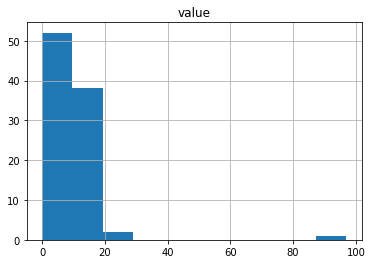

In [49]:
# read data on sugar content of cereals, sampled from a 
# supermarket in Michigan in 2004.
# copied from http://www.math.hope.edu/swanson/data/cereal.txt
# (and then edited)
d = pd.read_csv("data/cereals.txt", 
                names=["value"])
d.hist();

https://kanoki.org/2019/09/16/dataframe-visualization-with-pandas-plot/ - a quick rundown on plotting in Pandas. Usually, I prefer to use Matplotlib or Seaborn, which we'll cover in the next notebooks.